<a href="https://colab.research.google.com/github/mgmeti/language-model-course/blob/main/feature_engineering_for_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt


pd.options.display.max_colwidth = 200
%matplotlib inline

In [2]:
# buliding a corpus of documents
corpus = ['the sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown for jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is ;lazy and the brown fox is quick!']

In [3]:
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

In [4]:
corpus = np.array(corpus)

In [5]:
corpus_df = pd.DataFrame({'Document': corpus, 'Category':labels})

In [6]:
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,the sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown for jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is ;lazy and the brown fox is quick!,animals


### pre-processing of corpus

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
  # lowercase and remove special characters\whitepsace
  doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
  doc = doc.lower()
  doc = doc.strip()
  # tokenize document
  tokens = wpt.tokenize(doc)
  # filter stopwords out of document
  filtered_tokens = [token for token in tokens if token not in stop_words]
  # re-create document from filtered tokens
  doc = ' '.join(filtered_tokens)
  return doc

normalize_corpus = np.vectorize(normalize_document)


In [9]:
norms_corpus = normalize_corpus(corpus)
norms_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0.0,max_df=1.0)
cv_matrix = cv.fit_transform(norms_corpus)
cv_matrix

<8x20 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

In [11]:
# view non-zero feature positions in the sparse matrix
print(cv_matrix)

  (0, 17)	1
  (0, 3)	1
  (0, 2)	1
  (1, 17)	1
  (1, 3)	1
  (1, 2)	1
  (1, 14)	1
  (2, 15)	1
  (2, 5)	1
  (2, 11)	1
  (2, 13)	1
  (2, 6)	1
  (3, 12)	1
  (3, 4)	1
  (3, 16)	1
  (3, 10)	1
  (3, 0)	1
  (3, 7)	1
  (3, 18)	1
  (3, 1)	1
  (4, 14)	1
  (4, 16)	1
  (4, 10)	1
  (4, 0)	1
  (4, 7)	1
  (4, 9)	1
  (5, 3)	1
  (5, 15)	1
  (5, 5)	1
  (5, 13)	1
  (5, 6)	1
  (5, 8)	1
  (6, 17)	2
  (6, 3)	1
  (6, 2)	1
  (6, 19)	1
  (7, 15)	1
  (7, 5)	1
  (7, 13)	1
  (7, 6)	1
  (7, 8)	1


In [12]:
# view dense representation
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

In [13]:
# get all unique words in the corpus
vocab = cv.get_feature_names_out()
# note: get_feature_names() giving error
# AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'
# show document features vectors
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


### Bag of N-Grams Model

In [14]:
# you can set the n-gram range to 1,2 to get unigrams as well ass bigrams
bv =  CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norms_corpus)
bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names_out()
pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,brown jumps,dog lazy,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Model

Using TfidfTransformer

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer


tt = TfidfTransformer(norm='l2', use_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)
tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names_out()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.41,0.41,0.00,0.00,0.00,0.00,0.57,0.00,0.41,0.00,0.41,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.35,0.00,0.40,0.40,0.00,0.47,0.00,0.00,0.00,0.00,0.40,0.00,0.40,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.43,0.43,0.00,0.50,0.00,0.00,0.00,0.00,0.43,0.00,0.43,0.00,0.00,0.00,0.0


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0.0, max_df=1.0, norm="l2",
                     use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(norms_corpus)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.41,0.41,0.00,0.00,0.00,0.00,0.57,0.00,0.41,0.00,0.41,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.35,0.00,0.40,0.40,0.00,0.47,0.00,0.00,0.00,0.00,0.40,0.00,0.40,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.43,0.43,0.00,0.50,0.00,0.00,0.00,0.00,0.43,0.00,0.43,0.00,0.00,0.00,0.0


In [17]:
# get unique words as feature names
unique_words = list(set([word for doc in [doc.split() for doc in norms_corpus] for word in doc]))

def_feature_dict = {w: 0 for w in unique_words}
print('Feature Names:', unique_words)
print('Default Feature Dict:',def_feature_dict)

Feature Names: ['fox', 'lazy', 'blue', 'today', 'dog', 'toast', 'beans', 'ham', 'quick', 'brown', 'breakfast', 'sky', 'kings', 'bacon', 'eggs', 'green', 'sausages', 'love', 'jumps', 'beautiful']
Default Feature Dict: {'fox': 0, 'lazy': 0, 'blue': 0, 'today': 0, 'dog': 0, 'toast': 0, 'beans': 0, 'ham': 0, 'quick': 0, 'brown': 0, 'breakfast': 0, 'sky': 0, 'kings': 0, 'bacon': 0, 'eggs': 0, 'green': 0, 'sausages': 0, 'love': 0, 'jumps': 0, 'beautiful': 0}


In [18]:
from collections import Counter
# build bag of words features  for each document - term frequencies
bow_features =[]
for doc in norms_corpus:
  bow_feature_doc = Counter(doc.split())
  all_features = Counter(def_feature_dict)
  bow_feature_doc.update(all_features)
  bow_features.append(bow_feature_doc)

bow_features = pd.DataFrame(bow_features)
bow_features


,sky,blue,beautiful,fox,lazy,today,dog,toast,beans,ham,quick,brown,breakfast,kings,bacon,eggs,green,sausages,love,jumps
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,0
5,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
6,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0


In [19]:
import scipy.sparse as sp
feature_names =list(bow_features.columns)
# build the document frequency matrix

df = np.diff(sp.csc_matrix(bow_features, copy=True).indptr)
df = 1 + df
pd.DataFrame([df], columns=feature_names)

,sky,blue,beautiful,fox,lazy,today,dog,toast,beans,ham,quick,brown,breakfast,kings,bacon,eggs,green,sausages,love,jumps
0,4,5,4,3,4,2,4,2,2,3,4,4,2,2,3,3,2,3,3,2


In [20]:
# compute inverse document frequencies
total_docs = 1 + len(norms_corpus)
idf = 1.0 + np.log(float(total_docs) / df)
# show smoothened idfs
pd.DataFrame([np.round(idf, 2)], columns=feature_names)

,sky,blue,beautiful,fox,lazy,today,dog,toast,beans,ham,quick,brown,breakfast,kings,bacon,eggs,green,sausages,love,jumps
0,1.81,1.59,1.81,2.1,1.81,2.5,1.81,2.5,2.5,2.1,1.81,1.81,2.5,2.5,2.1,2.1,2.5,2.1,2.1,2.5


In [21]:
# compute idf diagonal matrix
total_features = bow_features.shape[1]
idf_diag = sp.spdiags(idf, diags=0, m=total_features, n=total_features)
idf_dense = idf_diag.todense()
# print the idf diagonal matrix
pd.DataFrame(np.round(idf_dense, 2))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.81,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,1.59,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.00,1.81,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.00,0.00,2.1,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.00,0.0,1.81,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.00,0.00,0.00,0.0,0.00,2.5,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.00,0.00,0.00,0.0,0.00,0.0,1.81,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.00,0.00,0.00,0.0,0.00,0.0,0.00,2.5,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,2.5,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,2.1,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# compute tf-idf feature matrix
tf = np.array(bow_features, dtype="float64")
tfidf = tf * idf
# view raw tf-idf feature matrix
pd.DataFrame(np.round(tfidf, 2), columns=feature_names)

,sky,blue,beautiful,fox,lazy,today,dog,toast,beans,ham,quick,brown,breakfast,kings,bacon,eggs,green,sausages,love,jumps
0,1.81,1.59,1.81,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.81,1.59,1.81,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2.1,0.0
2,0.00,0.00,0.00,0.0,1.81,0.0,1.81,0.0,0.0,0.0,1.81,1.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
3,0.00,0.00,0.00,0.0,0.00,0.0,0.00,2.5,2.5,2.1,0.00,0.00,2.5,2.5,2.1,2.1,0.0,2.1,0.0,0.0
4,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,2.1,0.00,0.00,0.0,0.0,2.1,2.1,2.5,2.1,2.1,0.0
5,0.00,1.59,0.00,2.1,1.81,0.0,1.81,0.0,0.0,0.0,1.81,1.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3.62,1.59,1.81,0.0,0.00,2.5,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.00,0.00,0.00,2.1,1.81,0.0,1.81,0.0,0.0,0.0,1.81,1.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from numpy.linalg import norm
# compute L2 norms
norms = norm(tfidf, axis=1)
# print norms for each document
print(np.round(norms, 3))
# compute normalized tf-idf
norm_tfidf = tfidf / norms[:, None]
# show final tf-idf feature matrix
pd.DataFrame(np.round(norm_tfidf, 2), columns=feature_names)

[3.013 3.672 4.403 6.534 5.319 4.477 5.019 4.186]


,sky,blue,beautiful,fox,lazy,today,dog,toast,beans,ham,quick,brown,breakfast,kings,bacon,eggs,green,sausages,love,jumps
0,0.60,0.53,0.60,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.49,0.43,0.49,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00
2,0.00,0.00,0.00,0.00,0.41,0.0,0.41,0.00,0.00,0.00,0.41,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57
3,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.38,0.38,0.32,0.00,0.00,0.38,0.38,0.32,0.32,0.00,0.32,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.39,0.00,0.00,0.00,0.00,0.39,0.39,0.47,0.39,0.39,0.00
5,0.00,0.35,0.00,0.47,0.40,0.0,0.40,0.00,0.00,0.00,0.40,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.72,0.32,0.36,0.00,0.00,0.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.50,0.43,0.0,0.43,0.00,0.00,0.00,0.43,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Extracting Features for New Documents

In [24]:
new_doc = 'the sky is green today'
pd.DataFrame(np.round(tv.transform([new_doc]).toarray(), 2),
             columns=tv.get_feature_names_out())

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.46,0.0,0.63


### Document Similarity

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.186878,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.153352,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.665444,0.000000,0.711707
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.186878,0.153352,0.665444,0.000000,0.000000,1.000000,0.112201,0.934996
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.112201,1.000000,0.000000
7,0.000000,0.000000,0.711707,0.000000,0.000000,0.934996,0.000000,1.000000


In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 
                         'Document\Cluster 2',
                         'Disatnce',
                         'Cluster Size'],
             dtype="object")

,Document\Cluster 1,Document\Cluster 2,Disatnce,Cluster Size
0,5.0,7.0,0.285693,2.0
1,0.0,6.0,0.308001,2.0
2,1.0,9.0,0.489844,3.0
3,2.0,8.0,0.601563,3.0
4,3.0,4.0,0.732945,2.0
5,10.0,12.0,2.695045,5.0
6,11.0,13.0,3.292202,8.0


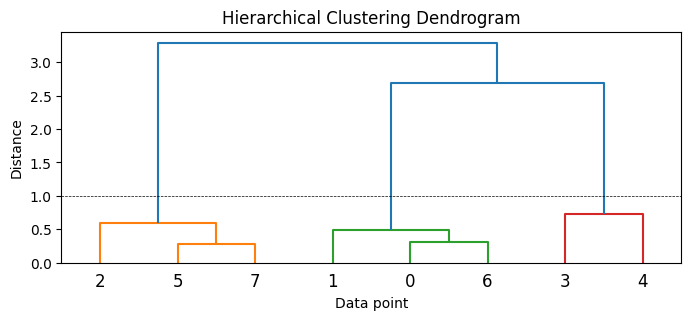

In [27]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c="k", ls="--", lw=0.5)

In [28]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0
cluster_labels = fcluster(Z, max_dist, criterion="distance")
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,the sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown for jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,3
4,"I love green eggs, ham, sausages and bacon!",food,3
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is ;lazy and the brown fox is quick!,animals,1


In [29]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=3, max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features

#   n_components : int, default=10
#  |      Number of topics.
#  |  
#  |      .. versionchanged:: 0.19
#  |          ``n_topics`` was renamed to ``n_components``

,T1,T2,T3
0,0.832138,0.083480,0.084383
1,0.863520,0.069100,0.067381
2,0.055762,0.055742,0.888496
3,0.037243,0.925552,0.037206
4,0.049122,0.903068,0.047811
5,0.054372,0.047780,0.897848
6,0.888263,0.055697,0.056040
7,0.055713,0.055697,0.888590


In [30]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
  topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
  topic = sorted(topic, key=lambda x: -x[1])
  topic = [item for item in topic if item[1] > 0.6]
  print(topic)
  print()
  

[('sky', 4.332420284614914), ('blue', 3.369714594526978), ('beautiful', 3.332344372269049), ('today', 1.3325411145489212), ('love', 1.3304174408404041)]

[('bacon', 2.332683312413163), ('eggs', 2.332683312413163), ('ham', 2.332683312413163), ('sausages', 2.332683312413163), ('love', 1.3354226502549864), ('beans', 1.332762173962392), ('breakfast', 1.332762173962392), ('kings', 1.332762173962392), ('toast', 1.332762173962392), ('green', 1.332527906144552)]

[('brown', 3.332340483222275), ('dog', 3.332340483222275), ('lazy', 3.332340483222275), ('quick', 3.332340483222275), ('fox', 2.332307721294407), ('jumps', 1.3322771901973052), ('blue', 1.2960212503467021)]



Load the bible corpus

In [34]:
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
from nltk.corpus import gutenberg
from string import punctuation

bible = gutenberg.sents('bible-kjv.txt')
remove_terms = punctuation + '0123456789'
norm_bible = [[word.lower() for word in sent if word not in remove_terms]  for sent in bible]
norm_bible = [' '.join(tok_sent) for tok_sent in norm_bible]
norm_bible = filter(None, normalize_corpus(norm_bible))
norm_bible = [tok_sent for tok_sent in norm_bible if len(tok_sent.split()) > 2]
print('Total lines:', len(bible))
print('\nSample line:', bible[10])
print('\nProcessed line:',norm_bible[10])

Total lines: 30103

Sample line: ['1', ':', '6', 'And', 'God', 'said', ',', 'Let', 'there', 'be', 'a', 'firmament', 'in', 'the', 'midst', 'of', 'the', 'waters', ',', 'and', 'let', 'it', 'divide', 'the', 'waters', 'from', 'the', 'waters', '.']

Processed line: god said let firmament midst waters let divide waters waters


In [ ]:
help(sequence)

Word2Vec Model

1) CBOW Model
>Build the corpus vocabulary <br>
>Build a CBOW(context, target) generator <br>
>Build the CBOW model architecture<br>
>Train the model<br>
>Get word embeddings

In [36]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_bible)
word2id = tokenizer.word_index
#build vocabulary of unique words
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_bible]
vocab_size = len(word2id)
embed_size = 100
window_size = 2 # context window size
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])


Vocabulary Size: 12425
Vocabulary Sample: [('shall', 1), ('unto', 2), ('lord', 3), ('thou', 4), ('thy', 5), ('god', 6), ('ye', 7), ('said', 8), ('thee', 9), ('upon', 10)]


In [41]:
from keras.utils import pad_sequences

In [42]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
  context_length = window_size*2
  for words in corpus:
    sentence_length = len(words)
    for index, word in enumerate(words):
      context_words = []
      label_word = []
      start = index - window_size
      end = index + window_size + 1
      context_words.append([words[i] for i in range(start, end) if 0 <= i < sentence_length and i != index])
      label_word.append(word)
      # AttributeError: module 'keras.preprocessing.sequence' has no attribute 'pad_sequences'
      # from keras.utils import pad_sequences
      x = pad_sequences(context_words, maxlen=context_length)
      y = np_utils.to_categorical(label_word, vocab_size)

      yield (x, y)

  
      

    

In [43]:
# Test this out for some samples
i = 0 
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size,
                                        vocab_size=vocab_size):
  if 0 not in x[0]:
    print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    if i == 10:
      break
    i += 1

Context (X): ['old', 'testament', 'james', 'bible'] -> Target (Y): king
Context (X): ['first', 'book', 'called', 'genesis'] -> Target (Y): moses
Context (X): ['beginning', 'god', 'heaven', 'earth'] -> Target (Y): created
Context (X): ['earth', 'without', 'void', 'darkness'] -> Target (Y): form
Context (X): ['without', 'form', 'darkness', 'upon'] -> Target (Y): void
Context (X): ['form', 'void', 'upon', 'face'] -> Target (Y): darkness
Context (X): ['void', 'darkness', 'face', 'deep'] -> Target (Y): upon
Context (X): ['spirit', 'god', 'upon', 'face'] -> Target (Y): moved
Context (X): ['god', 'moved', 'face', 'waters'] -> Target (Y): upon
Context (X): ['god', 'said', 'light', 'light'] -> Target (Y): let
Context (X): ['god', 'saw', 'good', 'god'] -> Target (Y): light


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 100)            1242500   
                                                                 
 lambda (Lambda)             (None, 100)               0         
                                                                 
 dense (Dense)               (None, 12425)             1254925   
                                                                 
Total params: 2,497,425
Trainable params: 2,497,425
Non-trainable params: 0
_________________________________________________________________
None


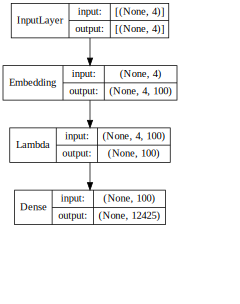

In [46]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size,
                   input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation="softmax"))
cbow.compile(loss='categorical_crossentropy', optimizer="rmsprop")
# view model summary
print(cbow.summary())
# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False,
                 rankdir='TB').create(prog='dot', format="svg"))

In [ ]:
for epoch in range(1, 6):
  loss = 0.0
  i = 0
  for x, y in generate_context_word_pairs(corpus=wids,
                                          window_size=window_size,
                                          vocab_size=vocab_size):
    i += 1
    loss += cbow.train_on_batch(x, y)
    if i % 1000 == 0:
      print('Processed {} (context, word) pairs'.format(i))
    print('Epoch:', epoch, '\tLoss:', loss)
    print()
                                    

In [ ]:
weights = cbow.get_weights()[0]
weights = weights[1:0]
print(weights.shape)
pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)
# view  contextually similae words
similar_words = {search_term: [id2word[idx] for idx in 
                               distance_matrix[word2id[search_term]-1].argsort()[1:6]+1]
                 for search_term in ['god', 'jesus','noah','egypt','john','gospel','moses','famine']}
similar_words

### The skip-gram model
>Build the corpus vocbulary

>Build skip-gram[(target, context), relevency] generator

>Build the skip-gram model architecture

>Train the model

>Get word embeddings

In [49]:
from keras.preprocessing import  text

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_bible)
word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}
vocab_size = len(word2id) + 1
embed_size = 100
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] 
        for doc in norm_bible]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Samples:', list(word2id.items())[:10])


Vocabulary Size: 12425
Vocabulary Samples: [('shall', 1), ('unto', 2), ('lord', 3), ('thou', 4), ('thy', 5), ('god', 6), ('ye', 7), ('said', 8), ('thee', 9), ('upon', 10)]


In [50]:
from keras.preprocessing.sequence import skipgrams
# genrate skip-grams
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]
# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
  print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(id2word[pairs[i][0]], pairs[i][0], id2word[pairs[i][1]], pairs[i][1], labels[i]))

(james (1154), injured (12086)) -> 0
(king (13), james (1154)) -> 1
(james (1154), king (13)) -> 1
(james (1154), bible (5766)) -> 1
(king (13), devotions (11757)) -> 0
(bible (5766), james (1154)) -> 1
(bible (5766), king (13)) -> 1
(king (13), bible (5766)) -> 1
(bible (5766), gushed (4930)) -> 0
(bible (5766), vain (549)) -> 0


In [ ]:
from keras.layers import Dot
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.models import Model
# build skip-gram architecture
word_model = Sequential()
word_model.add(Embedding(vocab_size, embed_size,
                         embeddings_initializer="glorot_uniform",
                         input_length=1))
word_model.add(Reshape((embed_size,)))

context_model = Sequential()
context_model.add(Embedding(vocab_size, embed_size,
                         embeddings_initializer="glorot_uniform",
                         input_length=1))
context_model.add(Reshape((embed_size,)))
model_arch = Dot(axes=1)([word_model.output, context_model.output])
model_arch = Dense(1, kernel_initializer="glorot_uniform",
                   activation="sigmoid")(model_arch)
model = Model